In [1]:
import os
from os.path import join, sep
from glob import glob
from random import choice

In [2]:
import tensorflow as tf
import matplotlib.pyplot as plt
from keras.layers import Rescaling, concatenate
from dotenv import find_dotenv, load_dotenv

In [3]:
from src.addons.images.load import load_image
from src.addons.watermark.layers import InverseRescaling, RGBToYCbCr, YCbCrToRGB, SplitLumaChroma

---

In [4]:
_ = load_dotenv(find_dotenv())

In [5]:
images_path = glob(join(os.environ.get("RAW_PATH"), "train") + sep + "*.jpg")
image_path = choice(images_path)

In [6]:
image = load_image(image_path)
image = Rescaling(scale=1.0 / 255.)(image)

2023-12-25 23:26:09.223147: I metal_plugin/src/device/metal_device.cc:1154] Metal device set to: Apple M1 Pro
2023-12-25 23:26:09.223166: I metal_plugin/src/device/metal_device.cc:296] systemMemory: 32.00 GB
2023-12-25 23:26:09.223172: I metal_plugin/src/device/metal_device.cc:313] maxCacheSize: 10.67 GB
2023-12-25 23:26:09.223199: I tensorflow/core/common_runtime/pluggable_device/pluggable_device_factory.cc:306] Could not identify NUMA node of platform GPU ID 0, defaulting to 0. Your kernel may not have been built with NUMA support.
2023-12-25 23:26:09.223216: I tensorflow/core/common_runtime/pluggable_device/pluggable_device_factory.cc:272] Created TensorFlow device (/job:localhost/replica:0/task:0/device:GPU:0 with 0 MB memory) -> physical PluggableDevice (device: 0, name: METAL, pci bus id: <undefined>)


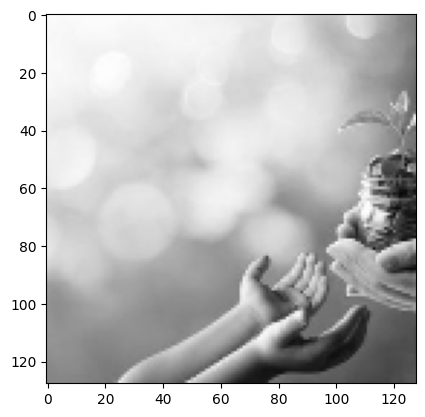

In [7]:
plt.imshow(image.numpy(), cmap="gray")

In [8]:
image_ = InverseRescaling(scale=1/255, offset=0.)(image)

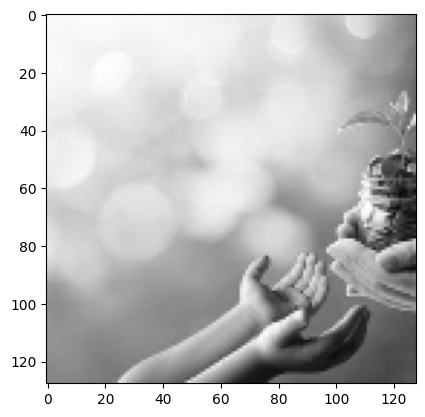

In [9]:
plt.imshow(tf.cast(image_.numpy(), tf.int32), cmap="gray")

---

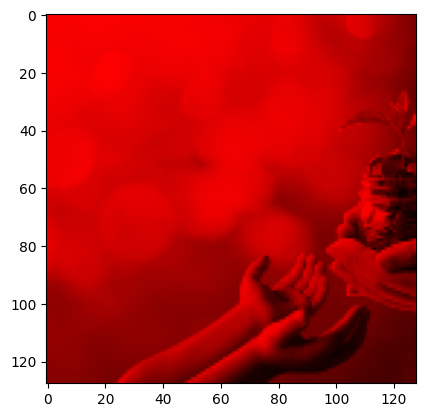

In [10]:
ycbcr_img = RGBToYCbCr()(image)
plt.imshow(ycbcr_img.numpy())

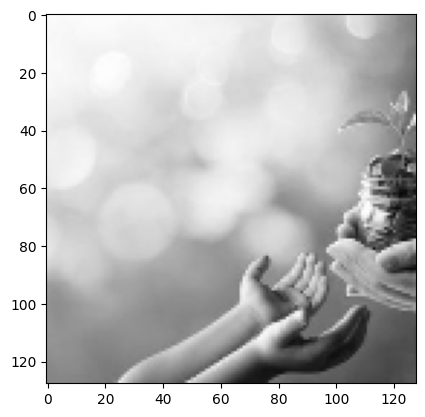

In [11]:
img = YCbCrToRGB()(ycbcr_img)
plt.imshow(img.numpy())

---

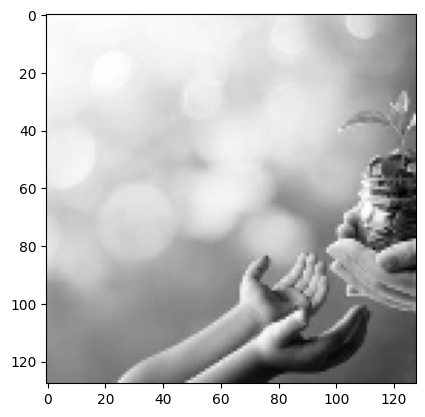

In [12]:
y_img, cbcr_img = SplitLumaChroma()(tf.expand_dims(ycbcr_img, axis=0))
plt.imshow(y_img.numpy()[0], cmap="gray")

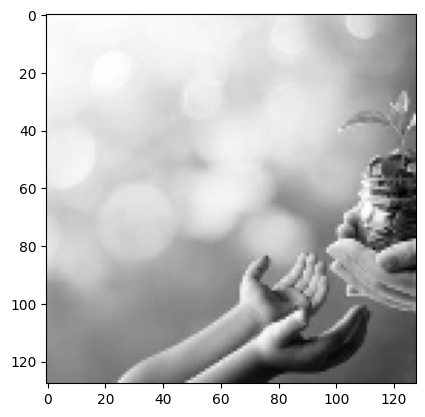

In [13]:
comb_img = concatenate([y_img, cbcr_img], axis=-1)
plt.imshow(y_img.numpy()[0], cmap="gray")